In [1]:
# install libraries
!pip install requests
!pip install bs4
!pip install lxml

In [2]:
# import packages
# analyse the data
import pandas as pd

# get data from internet
import requests     #access internet gather html files etc.

# parsing data with BeautifulSoup
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.worldometers.info/coronavirus/'

page = requests.get(url)     #use request page to lead this url

# make contact with website
page

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
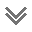

In [4]:
if page.status_code == 200:     # check if connection is ok then contunie
    html_doc = page.text

# look at the html code
soup = BeautifulSoup(html_doc)
print(soup.prettify())

In [5]:
# find the table elements
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# show all the tables
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [6]:
rows = table.find_all('tr')
print(rows)

[<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>, <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:lef

In [7]:
# all of the headers of the table
header = table.find_all("th")

# view the header
header

[<th width="1%">#</th>,
 <th width="100">Country,<br/>Other</th>,
 <th width="20">Total<br/>Cases</th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">New<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [8]:
# all of the data of the table
data = table.find_all("td")

# view the data
data

[<td></td>,
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>,
 <td>104,746,405</td>,
 <td>+123,892</td>,
 <td>1,485,310</td>,
 <td>+286</td>,
 <td>98,319,292</td>,
 <td>+103,550</td>,
 <td>4,941,803</td>,
 <td>8,485</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="North America" style="display:none;">North America</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>,
 <td>160,482,174</td>,
 <td>+130,729</td>,
 <td>1,437,907</td>,
 <td>+228</td>,
 <td>154,769,652</td>,
 <td>+127,158</td>,
 <td>4,274,615</td>,
 <td>10,372</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="Asia" style="display:none;">Asia</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>South America</nobr>
 </td>,
 <td>59,251,084</td>,
 <td>+81,351</td>,
 <t

In [9]:
# storage for the extracted data
output = []

column_names = ['ID',
                'Country',
                'Total Cases',
                'New Cases',
                'Total Deaths',
                'New Deaths',
                'Total Recovered',
                'New Recovered',
                'Active Cases',
                'Serious/Critical Cases',
                'Total Cases/1M Pop',
                'Total Test',
                'Test/1M Pop',
                'Population']

# create a for loop statement
for country in rows:
    country_data = country.find_all("td")     # we are using find all because anticipating more than one data
    if country_data:
        # extract the text within each element
        country_text = [td.text for td in country_data]
        output.append(dict(zip(column_names, country_text)))
        # creating the dics. Zip takes 2 lists/tuples in equal length, combine them in dic as key:value 
      
# create output
output

[{'ID': '',
  'Country': '\nNorth America\n',
  'Total Cases': '104,746,405',
  'New Cases': '+123,892',
  'Total Deaths': '1,485,310',
  'New Deaths': '+286',
  'Total Recovered': '98,319,292',
  'New Recovered': '+103,550',
  'Active Cases': '4,941,803',
  'Serious/Critical Cases': '8,485',
  'Total Cases/1M Pop': '',
  'Total Test': '',
  'Test/1M Pop': '',
  'Population': ''},
 {'ID': '',
  'Country': '\nAsia\n',
  'Total Cases': '160,482,174',
  'New Cases': '+130,729',
  'Total Deaths': '1,437,907',
  'New Deaths': '+228',
  'Total Recovered': '154,769,652',
  'New Recovered': '+127,158',
  'Active Cases': '4,274,615',
  'Serious/Critical Cases': '10,372',
  'Total Cases/1M Pop': '',
  'Total Test': '',
  'Test/1M Pop': '',
  'Population': ''},
 {'ID': '',
  'Country': '\nSouth America\n',
  'Total Cases': '59,251,084',
  'New Cases': '+81,351',
  'Total Deaths': '1,303,695',
  'New Deaths': '+351',
  'Total Recovered': '56,147,816',
  'New Recovered': '+25,936',
  'Active Cases'

In [10]:
# Create DataFrame directly from output
data = pd.DataFrame(output)
pd.set_option("display.max_rows", None)

# view DataFrame
data

ID                 Country  Total Cases New Cases Total Deaths  \
0              \nNorth America\n  104,746,405  +123,892    1,485,310   
1                       \nAsia\n  160,482,174  +130,729    1,437,907   
2              \nSouth America\n   59,251,084   +81,351    1,303,695   
3                     \nEurope\n  201,818,689  +330,450    1,852,871   
4                    \nOceania\n    9,566,775   +30,860       13,700   
5                     \nAfrica\n   12,284,941    +6,349      255,752   
6                           \n\n          721                     15   
7                          World  548,150,789  +703,631    6,349,250   
8      1                     USA   88,708,057  +102,270   1,040,639    
9      2                   India   43,381,064   +16,048     524,954    
10     3                  Brazil   32,030,729   +66,993     670,282    
11     4                  France   30,513,713   +79,262     149,317    
12     5                 Germany   27,681,775  +108,190     140,650    
13     6                      UK   22,592,827   +16,473     179,927    
14     7                  Russia   18,412,805    +3,154     380,776    
15     8                S. Korea   18,312,993    +7,210      24,498    
16     9                   Italy   18,128,044   +55,829     168,018    
17    10                  Turkey   15,085,742                98,996    
18    11                   Spain   12,681,820   +22,728     107,799    
19    12                 Vietnam   10,740,595                43,084    
20    13               Argentina    9,341,492               129,016    
21    14                   Japan    9,207,880   +16,782      31,091    
22    15             Netherlands    8,152,778    +5,184      22,354    
23    16               Australia    7,950,454   +30,677       9,600    
24    17                    Iran    7,235,928      +232     141,379    
25    18                Colombia    6,151,354               139,970    
26    19               Indonesia    6,076,894    +2,069     156,711    
27    20                  Poland    6,012,635      +348     116,412    
28    21                  Mexico    5,923,086   +16,133     325,511    
29    22                Portugal    5,120,970   +11,558      24,013    
30    23                 Ukraine    5,015,994               108,622    
31    24                    DPRK    4,696,580   +11,020          73    
32    25                Malaysia    4,549,847                35,742    
33    26                Thailand    4,509,541    +2,313      30,562    
34    27                 Austria    4,370,852    +8,933      18,757    
35    28                  Israel    4,286,132   +10,337      10,921    
36    29                 Belgium    4,211,511                31,883    
37    30            South Africa    3,991,003      +946     101,717    
38    31                   Chile    3,935,375   +11,128      58,346    
39    32                 Czechia    3,928,025      +757      40,312    
40    33                  Canada    3,926,613                41,865    
41    34             Switzerland    3,708,891                13,979    
42    35             Philippines    3,699,251      +770      60,507    
43    36                    Peru    3,605,614               213,425    
44    37                  Greece    3,595,498   +11,972      30,154    
45    38                  Taiwan    3,533,335   +45,767       5,969    
46    39                 Denmark    3,005,707    +1,214       6,438    
47    40                 Romania    2,915,487                65,726    
48    41                  Sweden    2,515,769                19,060    
49    42                    Iraq    2,336,764    +1,328      25,229    
50    43                  Serbia    2,025,042      +587      16,120    
51    44              Bangladesh    1,962,213    +1,685      29,135    
52    45                 Hungary    1,925,083                46,626    
53    46                Slovakia    1,793,688      +319      20,142    
54    47                  Jordan    1,697,271 

In [11]:
# Creating df for country data
data_continent=data.iloc[0:6]
data_continent

ID            Country  Total Cases New Cases Total Deaths New Deaths  \
0     \nNorth America\n  104,746,405  +123,892    1,485,310       +286   
1              \nAsia\n  160,482,174  +130,729    1,437,907       +228   
2     \nSouth America\n   59,251,084   +81,351    1,303,695       +351   
3            \nEurope\n  201,818,689  +330,450    1,852,871       +459   
4           \nOceania\n    9,566,775   +30,860       13,700        +42   
5            \nAfrica\n   12,284,941    +6,349      255,752        +23   

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,319,292      +103,550    4,941,803                  8,485   
1     154,769,652      +127,158    4,274,615                 10,372   
2      56,147,816       +25,936    1,799,573                 10,363   
3     193,196,150      +165,888    6,769,668                  5,860   
4       9,210,264           +38      342,811                    148   
5      11,469,918        +4,137      559,271                  1,026   

  Total Cases/1M Pop Total Test Test/1M Pop Population  
0                                                       
1                                                       
2                                                       
3                                                       
4                                                       
5

In [21]:
# Creating df for country data
data_country= data.drop(data.index[0:7])
data_country=data_country.drop(data.index[238:])
data_country

ID                 Country  Total Cases New Cases Total Deaths  \
7                          World  548,150,789  +703,631    6,349,250   
8      1                     USA   88,708,057  +102,270   1,040,639    
9      2                   India   43,381,064   +16,048     524,954    
10     3                  Brazil   32,030,729   +66,993     670,282    
11     4                  France   30,513,713   +79,262     149,317    
12     5                 Germany   27,681,775  +108,190     140,650    
13     6                      UK   22,592,827   +16,473     179,927    
14     7                  Russia   18,412,805    +3,154     380,776    
15     8                S. Korea   18,312,993    +7,210      24,498    
16     9                   Italy   18,128,044   +55,829     168,018    
17    10                  Turkey   15,085,742                98,996    
18    11                   Spain   12,681,820   +22,728     107,799    
19    12                 Vietnam   10,740,595                43,084    
20    13               Argentina    9,341,492               129,016    
21    14                   Japan    9,207,880   +16,782      31,091    
22    15             Netherlands    8,152,778    +5,184      22,354    
23    16               Australia    7,950,454   +30,677       9,600    
24    17                    Iran    7,235,928      +232     141,379    
25    18                Colombia    6,151,354               139,970    
26    19               Indonesia    6,076,894    +2,069     156,711    
27    20                  Poland    6,012,635      +348     116,412    
28    21                  Mexico    5,923,086   +16,133     325,511    
29    22                Portugal    5,120,970   +11,558      24,013    
30    23                 Ukraine    5,015,994               108,622    
31    24                    DPRK    4,696,580   +11,020          73    
32    25                Malaysia    4,549,847                35,742    
33    26                Thailand    4,509,541    +2,313      30,562    
34    27                 Austria    4,370,852    +8,933      18,757    
35    28                  Israel    4,286,132   +10,337      10,921    
36    29                 Belgium    4,211,511                31,883    
37    30            South Africa    3,991,003      +946     101,717    
38    31                   Chile    3,935,375   +11,128      58,346    
39    32                 Czechia    3,928,025      +757      40,312    
40    33                  Canada    3,926,613                41,865    
41    34             Switzerland    3,708,891                13,979    
42    35             Philippines    3,699,251      +770      60,507    
43    36                    Peru    3,605,614               213,425    
44    37                  Greece    3,595,498   +11,972      30,154    
45    38                  Taiwan    3,533,335   +45,767       5,969    
46    39                 Denmark    3,005,707    +1,214       6,438    
47    40                 Romania    2,915,487                65,726    
48    41                  Sweden    2,515,769                19,060    
49    42                    Iraq    2,336,764    +1,328      25,229    
50    43                  Serbia    2,025,042      +587      16,120    
51    44              Bangladesh    1,962,213    +1,685      29,135    
52    45                 Hungary    1,925,083                46,626    
53    46                Slovakia    1,793,688      +319      20,142    
54    47                  Jordan    1,697,271                14,068    
55    48                 Georgia    1,659,371                16,839    
56    49                 Ireland    1,587,385                 7,437    
57    50                Pakistan    1,533,047      +315      30,385    
58    51                  Norway    1,443,637      +746       3,280    
59    52               Singapore    1,397,074    +6,516       1,408    
60    53              Kazakhstan    1,306,110       +54      13,663    
61    54             New Zealand    1,294,657 

In [22]:
# Writing df as csv
data_country.to_csv('Covid Worldometer_Country', index=False)
data_continent.to_csv('Covid Worldometer_Continent', index=False)

In [23]:
# Crosscheck work with reading data
covid_country=pd.read_csv('Covid Worldometer_Country')
covid_country

ID                 Country  Total Cases New Cases Total Deaths  \
0      NaN                   World  548,150,789  +703,631    6,349,250   
1      1.0                     USA   88,708,057  +102,270   1,040,639    
2      2.0                   India   43,381,064   +16,048     524,954    
3      3.0                  Brazil   32,030,729   +66,993     670,282    
4      4.0                  France   30,513,713   +79,262     149,317    
5      5.0                 Germany   27,681,775  +108,190     140,650    
6      6.0                      UK   22,592,827   +16,473     179,927    
7      7.0                  Russia   18,412,805    +3,154     380,776    
8      8.0                S. Korea   18,312,993    +7,210      24,498    
9      9.0                   Italy   18,128,044   +55,829     168,018    
10    10.0                  Turkey   15,085,742       NaN      98,996    
11    11.0                   Spain   12,681,820   +22,728     107,799    
12    12.0                 Vietnam   10,740,595       NaN      43,084    
13    13.0               Argentina    9,341,492       NaN     129,016    
14    14.0                   Japan    9,207,880   +16,782      31,091    
15    15.0             Netherlands    8,152,778    +5,184      22,354    
16    16.0               Australia    7,950,454   +30,677       9,600    
17    17.0                    Iran    7,235,928      +232     141,379    
18    18.0                Colombia    6,151,354       NaN     139,970    
19    19.0               Indonesia    6,076,894    +2,069     156,711    
20    20.0                  Poland    6,012,635      +348     116,412    
21    21.0                  Mexico    5,923,086   +16,133     325,511    
22    22.0                Portugal    5,120,970   +11,558      24,013    
23    23.0                 Ukraine    5,015,994       NaN     108,622    
24    24.0                    DPRK    4,696,580   +11,020          73    
25    25.0                Malaysia    4,549,847       NaN      35,742    
26    26.0                Thailand    4,509,541    +2,313      30,562    
27    27.0                 Austria    4,370,852    +8,933      18,757    
28    28.0                  Israel    4,286,132   +10,337      10,921    
29    29.0                 Belgium    4,211,511       NaN      31,883    
30    30.0            South Africa    3,991,003      +946     101,717    
31    31.0                   Chile    3,935,375   +11,128      58,346    
32    32.0                 Czechia    3,928,025      +757      40,312    
33    33.0                  Canada    3,926,613       NaN      41,865    
34    34.0             Switzerland    3,708,891       NaN      13,979    
35    35.0             Philippines    3,699,251      +770      60,507    
36    36.0                    Peru    3,605,614       NaN     213,425    
37    37.0                  Greece    3,595,498   +11,972      30,154    
38    38.0                  Taiwan    3,533,335   +45,767       5,969    
39    39.0                 Denmark    3,005,707    +1,214       6,438    
40    40.0                 Romania    2,915,487       NaN      65,726    
41    41.0                  Sweden    2,515,769       NaN      19,060    
42    42.0                    Iraq    2,336,764    +1,328      25,229    
43    43.0                  Serbia    2,025,042      +587      16,120    
44    44.0              Bangladesh    1,962,213    +1,685      29,135    
45    45.0                 Hungary    1,925,083       NaN      46,626    
46    46.0                Slovakia    1,793,688      +319      20,142    
47    47.0                  Jordan    1,697,271       NaN      14,068    
48    48.0                 Georgia    1,659,371       NaN      16,839    
49    49.0                 Ireland    1,587,385       NaN       7,437    
50    50.0                Pakistan    1,533,047      +315      30,385    
51    51.0                  Norway    1,443,637      +746       3,280    
52    52.0               Singapore    1,397,074    +6,516       1,408    
53    53.0  

In [15]:
# Crosscheck work with reading data
covid_continent=pd.read_csv('Covid Worldometer_Continent')
covid_continent

ID            Country  Total Cases New Cases Total Deaths  New Deaths  \
0 NaN  \nNorth America\n  104,746,405  +123,892    1,485,310         286   
1 NaN           \nAsia\n  160,482,174  +130,729    1,437,907         228   
2 NaN  \nSouth America\n   59,251,084   +81,351    1,303,695         351   
3 NaN         \nEurope\n  201,818,689  +330,450    1,852,871         459   
4 NaN        \nOceania\n    9,566,775   +30,860       13,700          42   
5 NaN         \nAfrica\n   12,284,941    +6,349      255,752          23   

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,319,292      +103,550    4,941,803                  8,485   
1     154,769,652      +127,158    4,274,615                 10,372   
2      56,147,816       +25,936    1,799,573                 10,363   
3     193,196,150      +165,888    6,769,668                  5,860   
4       9,210,264           +38      342,811                    148   
5      11,469,918        +4,137      559,271                  1,026   

   Total Cases/1M Pop  Total Test  Test/1M Pop  Population  
0                 NaN         NaN          NaN         NaN  
1                 NaN         NaN          NaN         NaN  
2                 NaN         NaN          NaN         NaN  
3                 NaN         NaN          NaN         NaN  
4                 NaN         NaN          NaN         NaN  
5                 NaN         NaN          NaN         NaN

In [24]:
# Create and view a JSON output

import json
output_json=json.dumps(output)
print(output_json)

[{"ID": "", "Country": "\nNorth America\n", "Total Cases": "104,746,405", "New Cases": "+123,892", "Total Deaths": "1,485,310", "New Deaths": "+286", "Total Recovered": "98,319,292", "New Recovered": "+103,550", "Active Cases": "4,941,803", "Serious/Critical Cases": "8,485", "Total Cases/1M Pop": "", "Total Test": "", "Test/1M Pop": "", "Population": ""}, {"ID": "", "Country": "\nAsia\n", "Total Cases": "160,482,174", "New Cases": "+130,729", "Total Deaths": "1,437,907", "New Deaths": "+228", "Total Recovered": "154,769,652", "New Recovered": "+127,158", "Active Cases": "4,274,615", "Serious/Critical Cases": "10,372", "Total Cases/1M Pop": "", "Total Test": "", "Test/1M Pop": "", "Population": ""}, {"ID": "", "Country": "\nSouth America\n", "Total Cases": "59,251,084", "New Cases": "+81,351", "Total Deaths": "1,303,695", "New Deaths": "+351", "Total Recovered": "56,147,816", "New Recovered": "+25,936", "Active Cases": "1,799,573", "Serious/Critical Cases": "10,363", "Total Cases/1M Pop

In [25]:
# Save as JSON file
with open('Covid Data.json', 'w') as f:
    json.dump(output,f)

In [26]:
# Import JSON files and view them with the head() method
covid_data = pd.read_json(output_json)
covid_data.head()

ID            Country  Total Cases New Cases Total Deaths New Deaths  \
0     \nNorth America\n  104,746,405  +123,892    1,485,310       +286   
1              \nAsia\n  160,482,174  +130,729    1,437,907       +228   
2     \nSouth America\n   59,251,084   +81,351    1,303,695       +351   
3            \nEurope\n  201,818,689  +330,450    1,852,871       +459   
4           \nOceania\n    9,566,775   +30,860       13,700        +42   

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,319,292      +103,550    4,941,803                  8,485   
1     154,769,652      +127,158    4,274,615                 10,372   
2      56,147,816       +25,936    1,799,573                 10,363   
3     193,196,150      +165,888    6,769,668                  5,860   
4       9,210,264           +38      342,811                    148   

  Total Cases/1M Pop Total Test Test/1M Pop Population  
0                                                       
1                                                       
2                                                       
3                                                       
4

In [27]:
# Import JSON files and view them with the head() method
covid_data = pd.read_json(output_json)
covid_data.head()

ID            Country  Total Cases New Cases Total Deaths New Deaths  \
0     \nNorth America\n  104,746,405  +123,892    1,485,310       +286   
1              \nAsia\n  160,482,174  +130,729    1,437,907       +228   
2     \nSouth America\n   59,251,084   +81,351    1,303,695       +351   
3            \nEurope\n  201,818,689  +330,450    1,852,871       +459   
4           \nOceania\n    9,566,775   +30,860       13,700        +42   

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,319,292      +103,550    4,941,803                  8,485   
1     154,769,652      +127,158    4,274,615                 10,372   
2      56,147,816       +25,936    1,799,573                 10,363   
3     193,196,150      +165,888    6,769,668                  5,860   
4       9,210,264           +38      342,811                    148   

  Total Cases/1M Pop Total Test Test/1M Pop Population  
0                                                       
1                                                       
2                                                       
3                                                       
4

In [28]:
# Import JSON files and view them with the head() method
covid_data2 = pd.read_json('Covid Data.json')
covid_data2.head()

ID            Country  Total Cases New Cases Total Deaths New Deaths  \
0     \nNorth America\n  104,746,405  +123,892    1,485,310       +286   
1              \nAsia\n  160,482,174  +130,729    1,437,907       +228   
2     \nSouth America\n   59,251,084   +81,351    1,303,695       +351   
3            \nEurope\n  201,818,689  +330,450    1,852,871       +459   
4           \nOceania\n    9,566,775   +30,860       13,700        +42   

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,319,292      +103,550    4,941,803                  8,485   
1     154,769,652      +127,158    4,274,615                 10,372   
2      56,147,816       +25,936    1,799,573                 10,363   
3     193,196,150      +165,888    6,769,668                  5,860   
4       9,210,264           +38      342,811                    148   

  Total Cases/1M Pop Total Test Test/1M Pop Population  
0                                                       
1                                                       
2                                                       
3                                                       
4

In [29]:
covid_data_subset=covid_data[['Country', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Serious/Critical Cases']]
covid_data_subset.head()

Country  Total Cases Total Deaths Total Recovered Active Cases  \
0  \nNorth America\n  104,746,405    1,485,310      98,319,292    4,941,803   
1           \nAsia\n  160,482,174    1,437,907     154,769,652    4,274,615   
2  \nSouth America\n   59,251,084    1,303,695      56,147,816    1,799,573   
3         \nEurope\n  201,818,689    1,852,871     193,196,150    6,769,668   
4        \nOceania\n    9,566,775       13,700       9,210,264      342,811   

  Serious/Critical Cases  
0                  8,485  
1                 10,372  
2                 10,363  
3                  5,860  
4                    148

In [34]:
covid_data_subset_na=covid_data_subset[covid_data_subset.isna().any(axis=1)]
print(covid_data_subset_na.shape)

(0, 6)


In [38]:
# Creating df for country data
covid_data_subset_country= data.drop(data.index[0:7])
covid_data_subset_country=covid_data_subset_country.drop(data.index[238:])
covid_data_subset_country

ID                 Country  Total Cases New Cases Total Deaths  \
7                          World  548,150,789  +703,631    6,349,250   
8      1                     USA   88,708,057  +102,270   1,040,639    
9      2                   India   43,381,064   +16,048     524,954    
10     3                  Brazil   32,030,729   +66,993     670,282    
11     4                  France   30,513,713   +79,262     149,317    
12     5                 Germany   27,681,775  +108,190     140,650    
13     6                      UK   22,592,827   +16,473     179,927    
14     7                  Russia   18,412,805    +3,154     380,776    
15     8                S. Korea   18,312,993    +7,210      24,498    
16     9                   Italy   18,128,044   +55,829     168,018    
17    10                  Turkey   15,085,742                98,996    
18    11                   Spain   12,681,820   +22,728     107,799    
19    12                 Vietnam   10,740,595                43,084    
20    13               Argentina    9,341,492               129,016    
21    14                   Japan    9,207,880   +16,782      31,091    
22    15             Netherlands    8,152,778    +5,184      22,354    
23    16               Australia    7,950,454   +30,677       9,600    
24    17                    Iran    7,235,928      +232     141,379    
25    18                Colombia    6,151,354               139,970    
26    19               Indonesia    6,076,894    +2,069     156,711    
27    20                  Poland    6,012,635      +348     116,412    
28    21                  Mexico    5,923,086   +16,133     325,511    
29    22                Portugal    5,120,970   +11,558      24,013    
30    23                 Ukraine    5,015,994               108,622    
31    24                    DPRK    4,696,580   +11,020          73    
32    25                Malaysia    4,549,847                35,742    
33    26                Thailand    4,509,541    +2,313      30,562    
34    27                 Austria    4,370,852    +8,933      18,757    
35    28                  Israel    4,286,132   +10,337      10,921    
36    29                 Belgium    4,211,511                31,883    
37    30            South Africa    3,991,003      +946     101,717    
38    31                   Chile    3,935,375   +11,128      58,346    
39    32                 Czechia    3,928,025      +757      40,312    
40    33                  Canada    3,926,613                41,865    
41    34             Switzerland    3,708,891                13,979    
42    35             Philippines    3,699,251      +770      60,507    
43    36                    Peru    3,605,614               213,425    
44    37                  Greece    3,595,498   +11,972      30,154    
45    38                  Taiwan    3,533,335   +45,767       5,969    
46    39                 Denmark    3,005,707    +1,214       6,438    
47    40                 Romania    2,915,487                65,726    
48    41                  Sweden    2,515,769                19,060    
49    42                    Iraq    2,336,764    +1,328      25,229    
50    43                  Serbia    2,025,042      +587      16,120    
51    44              Bangladesh    1,962,213    +1,685      29,135    
52    45                 Hungary    1,925,083                46,626    
53    46                Slovakia    1,793,688      +319      20,142    
54    47                  Jordan    1,697,271                14,068    
55    48                 Georgia    1,659,371                16,839    
56    49                 Ireland    1,587,385                 7,437    
57    50                Pakistan    1,533,047      +315      30,385    
58    51                  Norway    1,443,637      +746       3,280    
59    52               Singapore    1,397,074    +6,516       1,408    
60    53              Kazakhstan    1,306,110       +54      13,663    
61    54             New Zealand    1,294,657 

In [42]:
# Exporting and saving as csv
covid_data_subset_country.to_csv('Covid Country Subset',index=False)

In [43]:
#Importing & checking data
df = pd.read_csv('Covid Country Subset')
df.head()

ID Country  Total Cases New Cases Total Deaths New Deaths Total Recovered  \
0  NaN   World  548,150,789  +703,631    6,349,250     +1,389     523,113,798   
1  1.0     USA   88,708,057  +102,270   1,040,639        +235      84,352,506   
2  2.0   India   43,381,064   +16,048     524,954         NaN      42,749,056   
3  3.0  Brazil   32,030,729   +66,993     670,282        +324      30,566,088   
4  4.0  France   30,513,713   +79,262     149,317         +49      29,471,796   

  New Recovered Active Cases Serious/Critical Cases Total Cases/1M Pop  \
0      +426,707   18,687,741                 36,254             70,323   
1       +94,593    3,314,912                  3,124            264,931   
2           NaN      107,054                    698             30,837   
3       +11,404      794,359                  8,318            148,605   
4       +25,132      892,600                    869            465,442   

  Total Test    Test/1M Pop Population  
0      814.5            NaN        NaN  
1      3,108  1,048,191,185  3,130,474  
2        373    859,493,387    610,960  
3      3,110     63,776,166    295,887  
4      2,278    271,490,188  4,141,181